<a href="https://colab.research.google.com/github/lakshya324/MLCOE-Task-1-EDA/blob/main/Task1_1_Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCOE Task 1.1 - Exploratory Data Analysis(EDA) [Self-Choose DataSet]
$\textrm{Lakshya Sharma} $

<details><summary>what is EDA?</summary>

<b>Exploratory data analysis (EDA)</b> is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
</details>

## Installing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Importing DataSet

[Dataset link](https://grouplens.org/datasets/movielens/)

In [2]:
imported_dataset=pd.read_csv('ratings.csv')
imported_dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
dataset=np.array(imported_dataset)[:,:-1]
dataset

array([[1.00000e+00, 1.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 4.00000e+00],
       [1.00000e+00, 6.00000e+00, 4.00000e+00],
       ...,
       [6.10000e+02, 1.68250e+05, 5.00000e+00],
       [6.10000e+02, 1.68252e+05, 5.00000e+00],
       [6.10000e+02, 1.70875e+05, 3.00000e+00]])

In [4]:
np.unique(dataset[:,2],return_counts=True)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 1370,  2811,  1791,  7551,  5550, 20047, 13136, 26818,  8551,
        13211]))

In [5]:
dataset[:,2][dataset[:,2]==5.]=10
dataset[:,2][dataset[:,2]==4.5]=9
dataset[:,2][dataset[:,2]==4.]=8
dataset[:,2][dataset[:,2]==3.5]=7
dataset[:,2][dataset[:,2]==3.]=6
dataset[:,2][dataset[:,2]==2.5]=5
dataset[:,2][dataset[:,2]==2.]=4
dataset[:,2][dataset[:,2]==1.5]=3
dataset[:,2][dataset[:,2]==1.]=2
dataset[:,2][dataset[:,2]==0.5]=1

In [6]:
dataset=dataset.astype(int)

In [7]:
total_reviews,review_counts=np.unique(dataset[:,2],return_counts=True)
print(total_reviews,review_counts)

[ 1  2  3  4  5  6  7  8  9 10] [ 1370  2811  1791  7551  5550 20047 13136 26818  8551 13211]


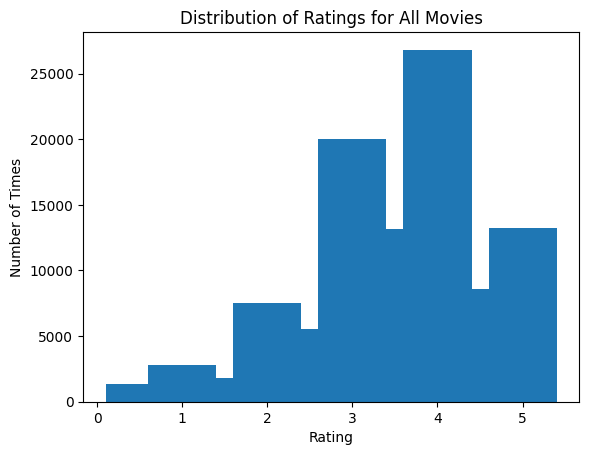

In [8]:
plt.bar(total_reviews/2,review_counts)
plt.title('Distribution of Ratings for All Movies')
plt.xlabel('Rating')
plt.ylabel('Number of Times')
plt.show()

## Data Preprocessing

### Converting data into Matrix
lines/rows -> User <br>
column -> Movies <br>
{if User didn't give that movie a rating then it will be zero}

In [9]:
#Getting the Maximum/Total number of Users and Movies
total_user=int(dataset[-1,0])
total_movies=int(max(dataset[:,1]))

In [10]:
#Creating Matrix Function
#   lines/rows -> User (let, max users = n)
#   column -> Movies (let, max movies = m)
#   {if User didn't give that movie a rating then it will be zero}
#           __                                       __
# User 1-> | 2   3   4   5    0   1  ... upto m movies |
# User 2-> | 1   0   0   2    4   3  ... upto m movies |
#  ...
# User n-> | 4   2   1   0    0   4  ... upto m movies |
#           __                                       __

def convert(data):
  array=np.empty((total_user,total_movies),dtype=int)
  for user in range(1,total_user+1):
    ratings=np.zeros(total_movies)
    ratings[data[:,1][data[:,0]==user]-1] =data[:,2][data[:,0]==user]
    #accessing reviewed movies index and give its value.
    #{movies number start from 1 but rating start from 0.hence, doing reviewed_movies-1}
    array[user - 1] = ratings

  return array

In [11]:
matrix=convert(dataset)

In [12]:
matrix

array([[ 8,  0,  8, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 5,  4,  4, ...,  0,  0,  0],
       [ 6,  0,  0, ...,  0,  0,  0],
       [10,  0,  0, ...,  0,  0,  0]])

## Finding Movie 1 Analysis

[ 0  1  3  4  5  6  7  8  9 10] [395   1   1   6   8  34  18  82  18  47]


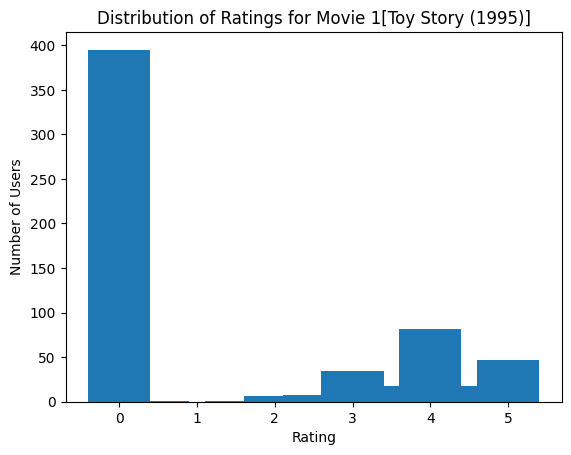

In [13]:
total_reviews_m1,review_counts_m1=np.unique(matrix[:,0],return_counts=True)
print(total_reviews_m1,review_counts_m1)
plt.bar(total_reviews_m1/2,review_counts_m1)
plt.title('Distribution of Ratings for Movie 1[Toy Story (1995)]')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [14]:
rated_movie=0
unwatched_movie=0
highest_rating={0:[0,0],1:[0,0],2:[0,0],3:[0,0],4:[0,0],5:[0,0],6:[0,0],7:[0,0],8:[0,0],9:[0,0],10:[0,0]}

for i in range(total_movies):
    rating=np.zeros(11,dtype=int)
    a,b=np.unique(matrix[:,i],return_counts=True)
    rating[a]=b
    if len(a)==1 and b[0]==total_user:
        # print(f"{i+1} Movie : No one watched it")
        unwatched_movie+=1
    else:
        print(f"{i+1:7d} Movie : {rating}")
        rated_movie+=1
        for j in range(len(highest_rating)):
            if rating[j]>highest_rating[j][1]:
                highest_rating[j] = [i + 1, rating[j]]

Streaming output truncated to the last 5000 lines.
   7055 Movie : [609   0   0   0   0   0   0   0   1   0   0]
   7056 Movie : [608   0   0   0   0   0   0   0   1   1   0]
   7057 Movie : [609   0   0   0   0   0   0   1   0   0   0]
   7058 Movie : [609   0   0   0   0   0   0   1   0   0   0]
   7059 Movie : [608   0   0   0   0   0   0   1   1   0   0]
   7060 Movie : [607   0   0   0   0   0   0   1   1   1   0]
   7061 Movie : [609   0   0   0   0   0   0   0   1   0   0]
   7062 Movie : [609   0   0   0   0   0   0   0   1   0   0]
   7063 Movie : [602   0   0   0   0   0   1   2   2   2   1]
   7064 Movie : [604   0   0   0   1   0   1   3   1   0   0]
   7065 Movie : [609   0   0   0   1   0   0   0   0   0   0]
   7067 Movie : [608   0   0   0   0   1   0   0   1   0   0]
   7069 Movie : [606   0   0   0   0   0   1   2   1   0   0]
   7070 Movie : [609   0   0   0   0   0   0   0   1   0   0]
   7071 Movie : [609   0   0   0   0   0   0   0   0   0   1]
   7072 Movie : [60

In [15]:
print(f"Total rated movies: {rated_movie}")
print(f"Total unwatched movies: {unwatched_movie}\n")
print("Highest Ratings:")
for key, value in highest_rating.items():
  print(f"Rating {key/2}: Movie {value[0]} with {value[1]} ratings.")

Total rated movies: 9724
Total unwatched movies: 183885

Highest Ratings:
Rating 0.0: Movie 49 with 609 ratings.
Rating 0.5: Movie 2683 with 7 ratings.
Rating 1.0: Movie 231 with 12 ratings.
Rating 1.5: Movie 2628 with 6 ratings.
Rating 2.0: Movie 344 with 27 ratings.
Rating 2.5: Movie 231 with 14 ratings.
Rating 3.0: Movie 592 with 89 ratings.
Rating 3.5: Movie 780 with 32 ratings.
Rating 4.0: Movie 480 with 97 ratings.
Rating 4.5: Movie 318 with 49 ratings.
Rating 5.0: Movie 318 with 153 ratings.


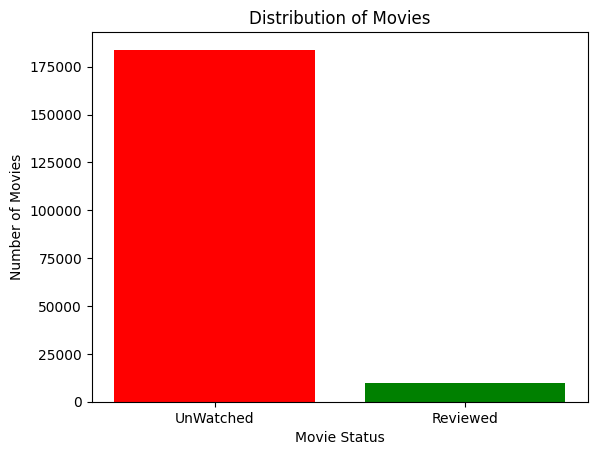

In [16]:
plt.bar(["UnWatched","Reviewed"],[unwatched_movie,rated_movie],color=['r','g'])
plt.title('Distribution of Movies')
plt.xlabel('Movie Status')
plt.ylabel('Number of Movies')
plt.show()

In [17]:
#Importing Movies
imported_movies=pd.read_csv('movies.csv')
imported_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [18]:
movies=imported_movies.iloc[:,:-1].values
movies

array([[1, 'Toy Story (1995)'],
       [2, 'Jumanji (1995)'],
       [3, 'Grumpier Old Men (1995)'],
       ...,
       [193585, 'Flint (2017)'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)']], dtype=object)

In [19]:
for i in highest_rating:
  index=highest_rating[i][0]
  movie_name=movies[movies[:, 0] == index,1]
  # print(str(movie_name[0]),highest_rating[i])
  highest_rating[i].append(str(movie_name[0]))

In [20]:
highest_rating

{0: [49, 609, 'When Night Is Falling (1995)'],
 1: [2683, 7, 'Austin Powers: The Spy Who Shagged Me (1999)'],
 2: [231, 12, 'Dumb & Dumber (Dumb and Dumber) (1994)'],
 3: [2628, 6, 'Star Wars: Episode I - The Phantom Menace (1999)'],
 4: [344, 27, 'Ace Ventura: Pet Detective (1994)'],
 5: [231, 14, 'Dumb & Dumber (Dumb and Dumber) (1994)'],
 6: [592, 89, 'Batman (1989)'],
 7: [780, 32, 'Independence Day (a.k.a. ID4) (1996)'],
 8: [480, 97, 'Jurassic Park (1993)'],
 9: [318, 49, 'Shawshank Redemption, The (1994)'],
 10: [318, 153, 'Shawshank Redemption, The (1994)']}

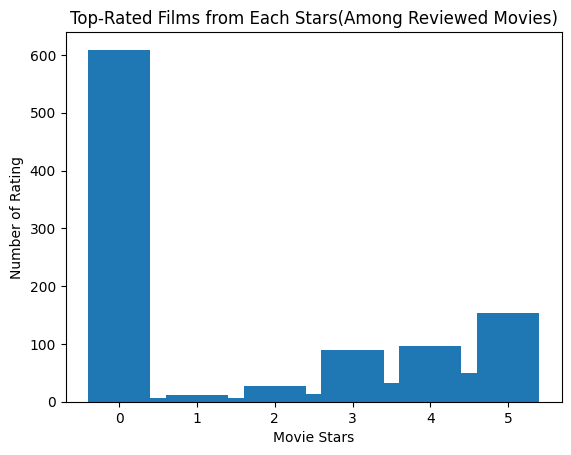

In [21]:
# plt.bar([f'{highest_rating[i][2]} {i}Stars' for i in range(6)],[highest_rating[i][1] for i in range(6)])
plt.bar([i/2 for i in range(11)],[highest_rating[i][1] for i in range(11)])
plt.title('Top-Rated Films from Each Stars(Among Reviewed Movies)')
plt.xlabel('Movie Stars')
plt.ylabel('Number of Rating')
plt.show()

Best Regards,<br>
<b>~Lakshya Sharma</b> <br>
(21/10/2023 10:26 PM)